# Module 3 : Performance measurements of Logistic regression and Linear regression algorithms

In [1]:
#import library packages
import pandas as p
import matplotlib.pyplot as plt
import seaborn as s
import numpy as n

In [2]:
#Load given dataset
data = p.read_csv("demo1.csv")

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=data.dropna()

In [5]:
df.head()

,slug,symbol,name,date,ranknow,open,high,low,close,volume,market_price,close_ratio,spread
0,ethereum,ETH,Ethereum,8/7/2015,3,2.830000,3.540000,2.520000,2.770000,164329,166610555,0.2451,1.02
1,ethereum,ETH,Ethereum,8/8/2015,3,2.790000,2.800000,0.714725,0.753325,674188,45486894,0.0185,2.09
2,ethereum,ETH,Ethereum,8/9/2015,3,0.706136,0.879810,0.629191,0.701897,532170,42399573,0.2901,0.25
3,ethereum,ETH,Ethereum,8/10/2015,3,0.713989,0.729854,0.636546,0.708448,405283,42818364,0.7706,0.09
4,ethereum,ETH,Ethereum,8/11/2015,3,0.708087,1.130000,0.663235,1.070000,1463100,64569288,0.8715,0.47


In [6]:
df.columns

Index(['slug', 'symbol', 'name', 'date', 'ranknow', 'open', 'high', 'low',
       'close', 'volume', 'market_price', 'close_ratio', 'spread'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1078 entries, 0 to 1077
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   slug          1078 non-null   object 
 1   symbol        1078 non-null   object 
 2   name          1078 non-null   object 
 3   date          1078 non-null   object 
 4   ranknow       1078 non-null   int64  
 5   open          1078 non-null   float64
 6   high          1078 non-null   float64
 7   low           1078 non-null   float64
 8   close         1078 non-null   float64
 9   volume        1078 non-null   int64  
 10  market_price  1078 non-null   int64  
 11  close_ratio   1078 non-null   float64
 12  spread        1078 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 117.9+ KB


In [8]:
del df['symbol']
del df['name']
del df['date']
del df['ranknow']
del df['close_ratio']
del df['spread']


In [9]:
df.columns

Index(['slug', 'open', 'high', 'low', 'close', 'volume', 'market_price'], dtype='object')

In [10]:
df["slug"].unique()

array(['ethereum', 'bitcoin', 'cardano', 'binance-coin'], dtype=object)

In [11]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['slug']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [13]:
df["slug"].unique()

array([3, 1, 2, 0])

In [14]:
df.head()

,slug,open,high,low,close,volume,market_price
0,3,2.830000,3.540000,2.520000,2.770000,164329,166610555
1,3,2.790000,2.800000,0.714725,0.753325,674188,45486894
2,3,0.706136,0.879810,0.629191,0.701897,532170,42399573
3,3,0.713989,0.729854,0.636546,0.708448,405283,42818364
4,3,0.708087,1.130000,0.663235,1.070000,1463100,64569288


In [15]:
df.tail()

,slug,open,high,low,close,volume,market_price
1073,0,14.57,14.84,13.75,13.93,86545104,1588081985
1074,0,13.85,13.93,12.33,12.63,68215200,1439908137
1075,0,12.61,13.19,12.20,13.00,54410900,1482570984
1076,0,13.03,13.37,12.64,13.01,49173800,1483449102
1077,0,12.96,13.20,12.70,12.76,43258400,1455064225


In [16]:

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score,median_absolute_error

In [17]:
X = df.drop(labels='market_price', axis=1)
#Response variable
y = df.loc[:,'market_price']    

In [18]:

#We'll use a test size of 30%. We also stratify the split on the response variable, which is very important to do because there are so few fraudulent transactions.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Logistic Regression :

In [19]:
from sklearn.linear_model import LogisticRegression
logR= LogisticRegression()
logR.fit(X_train,y_train)

predictR = logR.predict(X_test)

MAE= (mean_absolute_error(y_test,predictR))
print('MEAN ABSOLUTE ERROR VALUE IS :',MAE)
print(" ")

MSE=(mean_squared_error(y_test,predictR))
print('MEAN SQUARED ERROR VALUE IS :',MSE)
print(" ")

MedianAE=(median_absolute_error(y_test,predictR))
print('MEDIAN ABSOLUTE ERROR VALUE IS :',MedianAE)
print(" ")

EVS=(explained_variance_score(y_test,predictR)*100)
print('ACCURACY RESULT OF LOGISTIC REGRESSION IS :',EVS)
print(" ")

R2=(r2_score(y_test,predictR))
print('R2_SCORE VALUE IS :',R2)
print(" ")



MEAN ABSOLUTE ERROR VALUE IS : 11993794559.462963
 
MEAN SQUARED ERROR VALUE IS : 4.821828021966895e+17
 
MEDIAN ABSOLUTE ERROR VALUE IS : 12419393852.0
 
ACCURACY RESULT OF LOGISTIC REGRESSION IS : -1.5251803069257441
 
R2_SCORE VALUE IS : 0.9788731004840712
 


# LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression
linR= LinearRegression()
linR.fit(X_train,y_train)

predictL = linR.predict(X_test)

MAE= (mean_absolute_error(y_test,predictL))
print('MEAN ABSOLUTE ERROR VALUE IS :',MAE)
print(" ")

MSE=(mean_squared_error(y_test,predictL))
print('MEAN SQUARED ERROR VALUE IS :',MSE)
print(" ")

MedianAE=(median_absolute_error(y_test,predictL))
print('MEDIAN ABSOLUTE ERROR VALUE IS :',MedianAE)
print(" ")

EVS=(explained_variance_score(y_test,predictL)*100)
print('ACCURACY RESULT OF LINEAR REGRESSION IS :',EVS)
print(" ")

R2=(r2_score(y_test,predictL))
print('R2_SCORE VALUE IS :',R2)
print(" ")


MEAN ABSOLUTE ERROR VALUE IS : 1447586063.1038122
 
MEAN SQUARED ERROR VALUE IS : 9.014874172449865e+18
 
MEDIAN ABSOLUTE ERROR VALUE IS : 513045666.1115152
 
ACCURACY RESULT OF LINEAR REGRESSION IS : 60.85305915377125
 
R2_SCORE VALUE IS : 0.6050121656715569
 


Coefficients: 
 [ 6.94652790e+08 -2.11808438e+06  1.87417800e+06  2.35434089e+06
  8.65784891e+06  1.63976301e+01]
Variance score: 0.6050121656715569


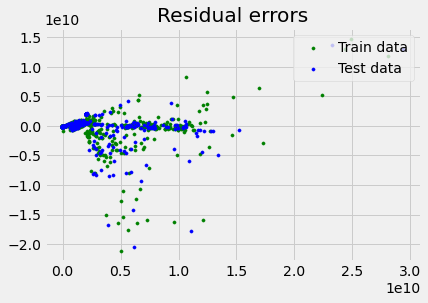

In [21]:
from sklearn.linear_model import LinearRegression
reg= LinearRegression()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
   color = "green", s = 10, label = 'Train data')
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
   color = "blue", s = 10, label = 'Test data')
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()